##### Reading the data

In [1]:
import pandas as pd 
df=pd.read_csv("user_reviews2.csv") 
df['Sentiment'] = [1 if x > 3 else 0 for x in df.Rating]
df.head()

,Unnamed: 0,ID1,Name,ID2,Topic,Review,Rating,Date,Sentiment
0,0,Dz49XFTtSbUtN1cgfZ-9uA,Karen C.,OIdyZ4tieuG0YBbMVjDtcA,Yamo,This is the most awful place I've ever set foo...,1,31-07-2014,0
1,1,ARXQsXEfamGNn5OCpPosiQ,Mike L.,k9GG1gFhQAQSQAYydjUjSQ,Mikado Sushi,Did happy hour here today. Five stars for bein...,5,04-06-2017,1
2,2,Ho47TvoR9I-ZxwMAMliwZg,John V.,DEeJ2qcDGZGBS8KJsJGC8w,All Good Pizza,I love the pizzas & sandwiches & beer garden v...,5,03-09-2018,1
3,3,FI0dcCAuFmW0lutdKO2UwA,Kyle K.,ix9rWyVohyRoAtARuTNOaw,Columbus Cafe,Bartenders here have big tudes but otherwise i...,2,07-07-2009,0
4,4,Ejgl_zozeJCbTTJyuB1Azw,Nicholas H.,VCjSMI5G99_lPRzichTBhg,Sushi Hon,Came to Sushi Hon as a late Valentine's Day di...,3,21-02-2018,0


##### For a classification problem:
We should ensure that the training set contains nearly equal samples of all available classes

In [2]:
df['Sentiment'].value_counts()

1    6016
0    6016
Name: Sentiment, dtype: int64

##### Cleaning the "review" Data

Step 1: Remove all html tags that may be incurred due to formatting options from the source

Step 2: Remove all redundant symbols like . , " etc...

Step 3: Convert to lowercase

Step 4: Remove all stopwords like 'i', 'this', 'that' etc...

In [3]:
from bs4 import BeautifulSoup
import re
                  
def utility(text):
    text=BeautifulSoup(text,"html.parser").get_text()
    text=re.sub('\[[^]]*\]', '',text)
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
                  
df['Review']=df['Review'].apply(utility)
df['Review']=df['Review'].str.lower()
df.head()

,Unnamed: 0,ID1,Name,ID2,Topic,Review,Rating,Date,Sentiment
0,0,Dz49XFTtSbUtN1cgfZ-9uA,Karen C.,OIdyZ4tieuG0YBbMVjDtcA,Yamo,this is the most awful place ive ever set foot...,1,31-07-2014,0
1,1,ARXQsXEfamGNn5OCpPosiQ,Mike L.,k9GG1gFhQAQSQAYydjUjSQ,Mikado Sushi,did happy hour here today five stars for being...,5,04-06-2017,1
2,2,Ho47TvoR9I-ZxwMAMliwZg,John V.,DEeJ2qcDGZGBS8KJsJGC8w,All Good Pizza,i love the pizzas sandwiches beer garden vib...,5,03-09-2018,1
3,3,FI0dcCAuFmW0lutdKO2UwA,Kyle K.,ix9rWyVohyRoAtARuTNOaw,Columbus Cafe,bartenders here have big tudes but otherwise i...,2,07-07-2009,0
4,4,Ejgl_zozeJCbTTJyuB1Azw,Nicholas H.,VCjSMI5G99_lPRzichTBhg,Sushi Hon,came to sushi hon as a late valentines day din...,3,21-02-2018,0


In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Review']=df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Unnamed: 0,ID1,Name,ID2,Topic,Review,Rating,Date,Sentiment
0,0,Dz49XFTtSbUtN1cgfZ-9uA,Karen C.,OIdyZ4tieuG0YBbMVjDtcA,Yamo,awful place ive ever set foot still cannot und...,1,31-07-2014,0
1,1,ARXQsXEfamGNn5OCpPosiQ,Mike L.,k9GG1gFhQAQSQAYydjUjSQ,Mikado Sushi,happy hour today five stars one best values city,5,04-06-2017,1
2,2,Ho47TvoR9I-ZxwMAMliwZg,John V.,DEeJ2qcDGZGBS8KJsJGC8w,All Good Pizza,love pizzas sandwiches beer garden vibe really...,5,03-09-2018,1
3,3,FI0dcCAuFmW0lutdKO2UwA,Kyle K.,ix9rWyVohyRoAtARuTNOaw,Columbus Cafe,bartenders big tudes otherwise ok place cool l...,2,07-07-2009,0
4,4,Ejgl_zozeJCbTTJyuB1Azw,Nicholas H.,VCjSMI5G99_lPRzichTBhg,Sushi Hon,came sushi hon late valentines day dinner sush...,3,21-02-2018,0


##### Data cleaned - now to encode it for training

Step 1: Tokenize (separate each word as a token in each review)

Step 2: Map the tokens to a sequence. Therefore, each unique word will have a number assigned to it, irrespective of the review it is present in

Step 3: Check the average length(=k) of the reviews.

Step 4: Make all the sequence-encoded-token-lists of the same length (=k). Those that are longer will be truncated and those that are shorted will be padded with '0's.

Note: '0' is a reserved token.

In [5]:
X, Y = (df['Review'], df['Sentiment'])

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)

X_seq = tk.texts_to_sequences(X) 
temp=[len(i) for i in X_seq]
print("Average length of a review is : "+str(sum(temp)/len(temp)))
print("Maximum length of a review is : "+str(max(temp)))

Using TensorFlow backend.


Average length of a review is : 58.196309840425535
Maximum length of a review is : 540


In [6]:
chosen_len=60
X_pad = pad_sequences(X_seq, maxlen=chosen_len, padding='post')

##### Now - the training data is fully prepared.

It is time to split into training and testing samples and train our model and test it.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 0)

'batch_size' determines the number of samples used to validate during the training.

The test data sets are not used at all during training.

In [33]:
batch_size = 300
X_train1 = X_train[batch_size:]
Y_train1 = Y_train[batch_size:]

X_valid = X_train[:batch_size]
Y_valid = Y_train[:batch_size]

##### Building the Model

'Sequential' specifies that the output from one layer shall be fed to the next layer and so on - used for a plain stack of layers (or tensors)

'model.add' is used to add a layer to our neural network. We need to specify the type of layer. 

'Dense' implies full connection between layers. 

'Dropout' layer randomly sets input units to 0 with a frequency of 'r' at each step during training time, which helps prevent overfitting. Inputs NOT set to 0 are scaled up by 1/(1-r) such that the sum over all inputs is unchanged.

'LSTM: Long Short-Term Memory' has feedback connections. It can process entire sequences of data. LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

'Embedding' layer is used mainly for text processing. Word embeddings are a type of word representation that allows words with similar meaning (in this case, sentiment) to have a similar representation.

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=chosen_len))
model.add(Dropout(0.4))
model.add(LSTM(100))   #Long Short Term Memory
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train1, Y_train1, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=4)

Train on 8724 samples, validate on 300 samples
Epoch 1/4
8724/8724 [==============================] - 24s 3ms/step - loss: 0.6839 - acc: 0.5606 - val_loss: 0.6180 - val_acc: 0.6467
Epoch 2/4
8724/8724 [==============================] - 20s 2ms/step - loss: 0.4515 - acc: 0.7960 - val_loss: 0.3591 - val_acc: 0.8200
Epoch 3/4
8724/8724 [==============================] - 20s 2ms/step - loss: 0.2505 - acc: 0.9065 - val_loss: 0.3129 - val_acc: 0.8600
Epoch 4/4
8724/8724 [==============================] - 20s 2ms/step - loss: 0.1692 - acc: 0.9420 - val_loss: 0.3087 - val_acc: 0.8933


##### Training for 4 epochs

From repeated experimentaion, I found that 4 epochs gives best results. It does not overfit too (since validation statistic is directly correlated to the training statistic).

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 60, 32)            1250176   
_________________________________________________________________
dropout_27 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 1,303,477
Trainable params: 1,303,477
Non-trainable params: 0
_________________________________________________________________


##### Evaluating the model

The test data that was set aside is now used, to make predictions on the sentiment of the review.

In [46]:
check_predict=model.predict_classes(X_test, verbose = 0)

In [47]:
test_df = pd.DataFrame(list(zip(X_test, Y_test, check_predict)), columns = ['Review','Sentiment','PredictedSentiment'])
test_df.PredictedSentiment = [1 if x == [1] else 0 for x in test_df.PredictedSentiment]
test_df.head()

,Review,Sentiment,PredictedSentiment
0,"[3, 76, 232, 598, 211, 4, 57, 1619, 19, 64, 88...",0,0
1,"[486, 61, 347, 11, 726, 82, 284, 1739, 124, 43...",0,0
2,"[842, 429, 29181, 300, 657, 96, 388, 658, 455,...",0,0
3,"[240, 4, 1531, 4188, 88, 2187, 3776, 1183, 21,...",1,1
4,"[1368, 737, 833, 492, 2, 51, 6, 352, 14, 337, ...",0,0


In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_df['Sentiment'],test_df['PredictedSentiment'])
print(cm)

[[1329  190]
 [ 214 1275]]


##### Confusion Matrix

It is a great way to visualize prediction results.

TP FN

FP TN

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

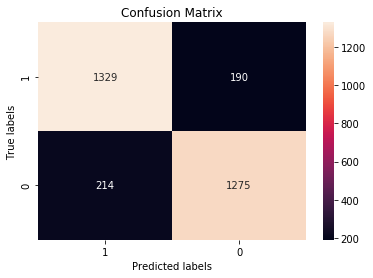

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels([1, 0])
ax.yaxis.set_ticklabels([1, 0])

##### Prediction Result Metric

Accuracy isn't always a good measure of model correctness. A high F1 score implies a reasonably good model

In [50]:
ac=round(100*(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]),2)
re=round(100*(cm[0][0])/(cm[0][0]+cm[0][1]),2)
pr=round(100*(cm[0][0])/(cm[0][0]+cm[1][0]),2)
print("Accuracy = "+str(ac)+"%")
print("Recall = "+str(re)+"%")
print("Precision = "+str(pr)+"%")
print("F1 Score = "+str(round(2*re*pr/(re+pr),2)))

Accuracy = 86.57%
Recall = 87.49%
Precision = 86.13%
F1 Score = 86.8


### Pretty Awesome Results!